# Applied Introduction to NumPy

### Resource: [learndatasci.com](https://www.learndatasci.com/tutorials/applied-introduction-to-numpy-python-tutorial/)

## What is NumPy?

Numpy is an open-source library for working efficiently with arrays. Developed in 2005 by Travis Oliphant, the name stands for Numerical Python. As a critical data science library in Python, many other libraries depend on it.



## Best place to get more info

The online documentation (https://numpy.org/doc/) is a great place to look for further information on topics introduced in this article. The documentation goes into more detail than this introduction and is continually updated with evolving best practices.

### Numpy Arrays

In [1]:
import numpy as np

In [2]:
# using np.array()
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [3]:
# Defining arrays: np.arange()
np.arange(1, 5)

array([1, 2, 3, 4])

In [4]:
# Defining arrays: np.zeros, np.ones, np.full
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [5]:
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

`np.full()` creates an array repeating a fixed value (defaults to zero). Here we create a 2x3 array with the number 7 in each element:

In [6]:
np.full((2, 3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

### Array shape

In [7]:
vector = np.arange(5)
vector

array([0, 1, 2, 3, 4])

In [8]:
vector.shape

(5,)

In [9]:
matrix = np.ones([3, 2])
matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [10]:
matrix.shape

(3, 2)

In [11]:
tensor = np.zeros([2, 3, 3])
tensor

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [12]:
tensor.shape

(2, 3, 3)

In [13]:
### Reshaping arrays
arr = np.arange(1, 10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# Reshape to 3x3 matrix
arr = arr.reshape(3, 3)
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
# Reshape back to the original size
arr = arr.reshape(9)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy can try to infer one of the dimensions if you use -1. You will still need to have precisely the correct number of digits for the inference to work.

In [16]:
arr = np.arange(1, 10).reshape(3, -1)
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Reading data from a file into an array

In [18]:
import csv

data = []

with open("exploratory_data_analysis/datasets/MER_T07_02A.csv", "r") as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    for row in file_reader:
        data.append(row)

data = np.array(data)  # convert the list of lists to a NumPy array

data[:5]

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195113', '185203.657', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195213', '195436.666', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

We now have our data stored in a NumPy array that we've named data. For much of the remainder of this article, we'll be exploring how NumPy's functionality can be used to manipulate and gain insights into this data.

First, we'll explore some attributes of the array. One thing that we may want to know about an array is its dimensions:

In [19]:
data.shape

(8438, 6)

In [21]:
data.dtype.type

numpy.str_

### Saving
When we are ready to save our data, we can use the save function.

In [23]:
np.save(open('data.npy', 'wb'), data)  # Saves data to a binary file with the .npy extension

### Indexing

#### Basics of indexing notation

* **Commas** separate axes of an array.
* **Colons** mean "through". For example, x[0:4] means the first 5 rows (rows 0 through 4) of x.
* **Negative** numbers mean "from the end of the array." For example, x[-1] means the last row of x.
* **Blanks before or after colons** means "the rest of". For example, x[3:] means the rest of the rows in x after row 3. Similarly, x[:3] means all the rows up to row 3. x[:] means all rows of x.
* When there are **fewer indices than axes**, the missing indices are considered complete slices. For example, in a 3-axis array, x[0,0] means all data in the 3rd axis of the 1st row and 1st column.
* **Dots "..."** mean as many colons as needed to produce a complete indexing tuple. For example, x[1,2,...] is the same as x[1,2,:,:,:].

In the following code, we'll explore some useful examples of selecting subsets from an array.

### Examples

![examples](https://storage.googleapis.com/lds-media/images/numpy-indexing-arrays.width-1200.jpg)

### Indexing example 1: Colons and commas

Let's say we are interested in the first ten rows in the 4th column. We can use the following syntax to index this array section: __array[start_row:end_row, col]__

In [24]:
data[0:10, 4]

array(['Description', 'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors'], dtype='<U80')

### Indexing example 1: Colons as *all* rows or columns

A colon can also denote all rows, or all columns. Here, we index all rows of column 4.

In [25]:
data[:, 4]

array(['Description', 'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors', ...,
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype='<U80')

### Indexing example 3: Subset of columns
We can use the same format for any dimension of an array. The general syntax is: `array[start_row:end_row, start_col:end_col]`. The following indexes all rows and the second column up to (but not including) the 4th column:



In [26]:
data[:, 2:4]

array([['Value', 'Column_Order'],
       ['135451.32', '1'],
       ['154519.994', '1'],
       ...,
       ['344970.366', '13'],
       ['4009085', '13'],
       ['350815.342', '13']], dtype='<U80')

### Indexing example 4: Explicitly specifying column numbers

What if the columns we need are not next to each other? Instead of indexing a range of columns, it can be useful to specify them explicitly. To explicitly specify particular columns, we just include them in a list. Let's index the five rows after the header, selecting only columns 2 and 3. This time, we'll write the output to a new array named subset that we can re-use in the following example.

In [27]:
subset = data[1:6, [2, 3]]
subset

array([['135451.32', '1'],
       ['154519.994', '1'],
       ['185203.657', '1'],
       ['195436.666', '1'],
       ['218846.325', '1']], dtype='<U80')

### Indexing example 5: Mask arrays

Another convenient way to index certain sections of a NumPy array is to use a mask array. A mask array, also known as a logical array, contains boolean elements (i.e. True or False). Indexing of a given array element is determined by the value of the mask array's corresponding element.

First, we define a NumPy array of True/False values, where the True values are the ones we want to keep. Then we mask the `subset` array from the previous example. The result is retaining only the rows that correspond to elements that are True in the mask array.

In [28]:
mask_array = np.array([False, True, False, True, True])
subset[mask_array]

array([['154519.994', '1'],
       ['195436.666', '1'],
       ['218846.325', '1']], dtype='<U80')

As you can see, the mask array retained the rows corresponding to True and the excluded the ones corresponding to False. It is worth noting that a similar approach is used for indexing pandas dataframes.

Masking is a powerful tool that allows us to index elements based on logical expressions.

### Concatenating

NumPy also provides useful functions for concatenating (i.e., joining) arrays. Let's say we wanted to restrict our attention to the first and the last three rows of our dataset. First, we'll define new sub-arrays as follows:

In [29]:
array_start = data[:3, :]
array_start

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

In [30]:
array_end = data[-3:, :]
array_end

array([['ELETPUS', '202012', '344970.366', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202013', '4009085', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202101', '350815.342', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours']], dtype='<U80')

To concatenate these arrays we can use `np.vstack`, where the v denotes vertical, or row-wise, stacking of the sub-arrays:

In [31]:
np.vstack((array_start, array_end))

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202012', '344970.366', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202013', '4009085', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202101', '350815.342', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Here we've stacked the first three rows and last three rows on top of each other.

The horizontal counterpart of `np.vstack()` is `np.hstack()`, which combines sub-arrays column-wise. For higher dimensional joins, the most common function is `np.concatenate()`. The syntax for this function is similar to the 2D versions, with the additional requirement of specifying the axis along which concatenation should be performed.

Calling `np.concatenate((array_start, array_end), axis = 0)` would generate identical output to using `np.vstack()`. Axis=1 would generate identical output to using `np.hstack()`.

### Splitting
The opposite of concatenating (i.e., joining) arrays is splitting them. To split an array, NumPy provides the following commands:

* **hsplit**: splits along the horizontal axis
* **vsplit**: splits along the vertical axis
* **dsplit**: Splits an array along the 3rd axis (depth)
* **array_split**: lets you specify the axis to use in splitting

### Adding/Removing Elements
NumPy provides several functions for adding or deleting data from an array:

* **resize**: Returns a new array with the specified shape, with zeros as placeholders in all the new cells.
* **append**: Adds values to the end of an array
* **insert**: Adds values in the middle of an array
* **delete**: Returns a new array with given data removed
* **unique**: Finds only the unique values of an array

### Sorting
There are several useful functions for sorting array elements. Some of the available sorting algorithms include `quicksort`, `heapsort`, `mergesort`, and `timesort`.

For example, here's how you'd merge sort the columns of an array:

In [33]:
arr = np.array([[3, 8, 1, 2], [9, 5, 4, 8]])
np.sort(arr, axis=1, kind='mergesort')  # Sort by column

array([[1, 2, 3, 8],
       [4, 5, 8, 9]])

### No Copy vs. Shallow Copy vs. Deep Copy
A common source of confusion NumPy beginners is knowing when data is and isn't copied into a new object.

**No copy**: function calls and assignments:

In [35]:
print(id(arr))

# Object "b" points to object "a". No new object is created.
b = arr 

# Python passes objects as references. No copy is made.
def f(x):
    print(id(x))

f(b)

4698419888
4698419888


Notice the id of `b` is the same as `a`, even if it's passed into a function.

**View/Shallow Copy**: Arrays that share some data. The view method creates an object looking at the same data. Slicing an array returns a view of that array.



In [36]:
# View
arr = b.view()

# The shape of b doesn't change
arr = arr.reshape((4, 2))

# Slice
# arr[:] is the view of "a".
arr[:] = 5
arr

array([[5, 5],
       [5, 5],
       [5, 5],
       [5, 5]])

In [37]:
b

array([[5, 5, 5, 5],
       [5, 5, 5, 5]])

**Deep copy**: Use the copy method to make a complete copy of an array and all its data.

In [38]:
c = arr.copy()
c

array([[5, 5],
       [5, 5],
       [5, 5],
       [5, 5]])

The `copy()` method creates the new array object `c` that is identical to `a`.

In [39]:
print(id(arr))
print(id(c))

4705174432
4702911664


## Section 2: Must-know tools
Let's now look at three NumPy tools that are especially handy in data science applications: broadcasting, vectorization, and pseudo-random number generation. For this section, we'll put our electricity dataset aside in favor of even more straightforward examples.

### Broadcasting

![broadcasting](https://storage.googleapis.com/lds-media/images/fig_broadcast_visual_1.width-1200.jpg)

Broadcasting is a process performed by NumPy that allows mathematical operations to work with objects that don't necessarily have compatible dimensions.

Let's explore broadcasting using some examples.

### Broadcasting example 1: Adding a scalar to a matrix
Suppose we would like to add 1 to each element of a 2x2 array. With NumPy arrays, it is as simple as defining the array and adding 1:

In [40]:
array_a = np.array([
    [1, 2],
    [3, 4]
])
array_a + 1

array([[2, 3],
       [4, 5]])

### Broadcasting example 2: Multiplying a matrix by a scalar
Multiplication works the same way as addition.

In [42]:
array_a * 2

array([[2, 4],
       [6, 8]])

### Broadcasting example 3:
We can use broadcasting in cases beyond just overcoming the dimensional mismatch between a scalar and an array. NumPy can also broadcast arrays to enable computations with other arrays.

Let's say that each row of array_a, defined above, is a collection of two objects. The coordinates of the first object (first row of array_a) is located at (x = 1, y = 2), and the other object (second row of array_a) is located at (x = 3, y = 4). To find the coordinates of both objects if they both were translated by 3 units in the x direction and 1 unit in the y direction, all we would need to do is add (3, 1) to array_a:

In [43]:
array_a + np.array([3, 1])

array([[4, 3],
       [6, 5]])

### Vectorization
Vectorization is the process of modifying code to utilize array operation methods. Array operations can be computed internally by NumPy using a lower-level language, which leads to many benefits:

* Vectorized code tends to execute much faster than equivalent code that uses loops (such as for-loops and while-loops). Usually a lot faster. Therefore, vectorization can be very important for machine learning, where we often work with large datasets
* Vectorized code can often be more compact. Having fewer lines of code to write can potentially speed-up the code-writing process, make code more readable, and reduce the risk of errors

Let's consider a problem where we have two one-dimensional arrays, `a` and `b`, and we need to multiply each element in `a` with the corresponding element in `b`.

First we'll define some arbitrary values for `a` and `b`:

In [44]:
a = np.arange(1, 51)
b = np.arange(51, 101)

print(f"array a: {a}")
print(f"\narray b: {b}")

array a: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

array b: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


First we'll multiply the elements using a simple Python loop. This is the **non-vectorized version**:

In [45]:
def non_vectorized_output(a, b):
    output = []
    for j in range(len(a)):
        output.append(a[j] * b[j])
    return output


#### Calculating the speed up
Using Jupyter's magic `timeit` command, we can calculate how long it takes to run this function over many executions:

In [46]:
nv_time = %timeit -o non_vectorized_output(a, b)

45.9 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The `%timeit -o` command will run a function over many executions and store the timing results in a variable. You can also just run `%timeit non_vectorized_output(a, b)` if you don't care about storing the result in a variable.

Now we'll use the multiplication operator between arrays to allow Numpy to handle the multiplication instead. This is the **vectorized version**:



In [47]:
def vectorized_output(a, b):
    return a * b

In [48]:
v_time = %timeit -o vectorized_output(a, b)

1.44 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


As you can see, the looping in the non-vectorized version is performed in pure Python (i.e., without using NumPy) with a for-loop. Although it would be challenging to make this non-vectorized code function any more compactly, it still occupies three more lines of code than the vectorized version. This compactness is in part because the looping in the vectorized version happens in the background.

It's clear that vectorized code is more compact, but what is the difference in computation time? Let's print the results in a way that's easier to read:

In [49]:
print('Non-vectorized version:', f'{1E6 * nv_time.average:0.2f}', 'microseconds per execution, average')

print('Vectorized version:', f'{1E6 * v_time.average:0.2f}', 'microseconds per execution, average')

print('Computation was', "%.0f" % (nv_time.average / v_time.average), 'times faster using vectorization')

Non-vectorized version: 45.90 microseconds per execution, average
Vectorized version: 1.44 microseconds per execution, average
Computation was 32 times faster using vectorization


### Vectorization example 2
In this second example, we'll evaluate a set of linear expressions. Again, this task could be accomplished either using for-loops or using vectorized code.

In this case, the vectorized version will use matrix multiplication to evaluate the linear expressions. If you're familiar with machine learning (ML), the next paragraph will provide some context about when you might encounter this in ML.

#### Machine Learning context
Let's imagine a machine learning problem where we use a linear regression algorithm to model the cost of electricity.

Let's denote our model features as x1,x2...xn. Features could represent things like the **amount of available wind energy**, the **current gas price**, and the **current load on the grid**.

After we train the algorithm, we obtain model parameters, θ0,θ1,θ2...θn. These model parameters constitute the weights that should be used for each feature.

For instance, x2 might represent the price of gas. The model might find that gas prices are particularly decisive in determining the price of electricity. The corresponding weight of θ2 would then be expected to be much larger in magnitude than other weights for less important features. The result (hypothesis/prediction) returned by our linear regression model for a given set of x is a linear expression:

$h=θ_{0}+x_{1}θ_{1}+x_{2}θ_{2}+...+x_{n}θ_{n}$

Furthermore, let's assume we have a set of m test examples. In other words, we have m sets of x for which we would like to obtain the model's prediction. The linear expression, h, is to be calculated for each of the test examples. There will be a total of m individual hypothesis outputs.

As we'll see below, this can all be calculated concisely using one vectorized statement. To start, we'll define some arbitrary values for the array of test examples (x), and the vector of model parameters (θ, theta).

In an ML problem, our model parameters would be calculated as an output of an optimization procedure. For the sake of this example, we'll just use arbitrary values.

First, define a 10x4 array (`x`) in which each row is a training set. Here, m=10 and n=4:

In [50]:
x = np.arange(1, 41).reshape(10, 4)

print(f"x:\n{x}")

x:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]
 [33 34 35 36]
 [37 38 39 40]]


`x` is now a range of 40 numbers reshaped to be 10 rows by 4 columns.

Now, add a column of ones to represent $x_{0}$, known in machine learning as the bias term. `x` is now a 10x5 array:

In [51]:
ones = np.full((10, 1), 1)

x = np.hstack((ones, x))

print(f"x:\n{x}")

x:
[[ 1  1  2  3  4]
 [ 1  5  6  7  8]
 [ 1  9 10 11 12]
 [ 1 13 14 15 16]
 [ 1 17 18 19 20]
 [ 1 21 22 23 24]
 [ 1 25 26 27 28]
 [ 1 29 30 31 32]
 [ 1 33 34 35 36]
 [ 1 37 38 39 40]]


Using `np.full`, we created a 10x1 array full of ones then horizontally stacked it (`np.hstack`) to the front of `x`.

Now let's initialize our model parameters as a 5x1 array

In [52]:
theta = np.arange(1, 6).reshape(5, 1)
print(f"theta:\n{theta}")

theta:
[[1]
 [2]
 [3]
 [4]
 [5]]


Armed with our matrix x and vector θ, we'll proceed to define vectorized and non-vectorized versions of evaluating the linear expressions to compare the computation time.

In [53]:
# Non-vectorized version
def non_vectorized_output(x, theta):
    h = []
    for i in range(x.shape[0]):
        total = 0
        for j in range(x.shape[1]):
            total = total + x[i, j] * theta[j, 0]
        h.append(total)
    return h

# Vectorized version
def vectorized_output(x, theta):
    h = np.matmul(x, theta)  # NumPy's matrix multiplication function
    return h

In [54]:
nv_time = %timeit -o non_vectorized_output(x, theta)

77.7 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [60]:
v_time = %timeit -o vectorized_output(x, theta)

4.25 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [62]:
print('Non-vectorized version:', f'{1E6 * nv_time.average:0.2f}', 'microseconds per execution, average')

print('Vectorized version:', f'{1E6 * v_time.average:0.2f}', 'microseconds per execution, average')

print('Computation was', "%.0f" % (nv_time.average / v_time.average), 'times faster using vectorization')

Non-vectorized version: 77.68 microseconds per execution, average
Vectorized version: 4.25 microseconds per execution, average
Computation was 18 times faster using vectorization


Note that in both examples, NumPy's vectorized calculations significantly outperformed native Python calculations using loops. The improved performance is substantial.

However, vectorization does have potential disadvantages. Vectorized code can be less intuitive to those who do not know how to read it. It can also be more memory intensive. The skill of knowing how much vectorization to use in your code is something that you'll develop with experience. The decision will always need to be made based on the nature of the application in question.

## Pseudo-random number generation
Before we finish this section, there is one more NumPy functionality that we should cover: pseudo-random number generation.

Being able to generate pseudo-random numbers is often necessary in data science applications. Examples include modeling system noise and Monte Carlo simulations.

Below we'll see how to generate random numbers (x) from two commonly encountered probability distributions: the uniform distribution and the normal (Gaussian) distribution.

For this, we'll import `matplotlib` and set some default plotting styles:

In [63]:
import matplotlib.pyplot as plt
import matplotlib

# Set some default plotting parameters
matplotlib.rcParams.update({
    "font.size": 16,
    "figure.figsize": [10, 6],
    "lines.markersize": 6
})

For the Uniform, we'll generate a NumPy array with 1000 samples randomly selected from a uniform distribution using `random.rand`.

For the Normal, we'll generate a NumPy array with 1000 samples from a normal distribution centred at 5 with a standard deviation of 3 using `random.normal`:

In [64]:
uniform_data = np.random.rand(1000)
normal_data = np.random.normal(loc=5, scale=3.0, size=1000)

Here's a plot of the histograms for the Uniform data (first subplot) and the Normal data (second subplot):



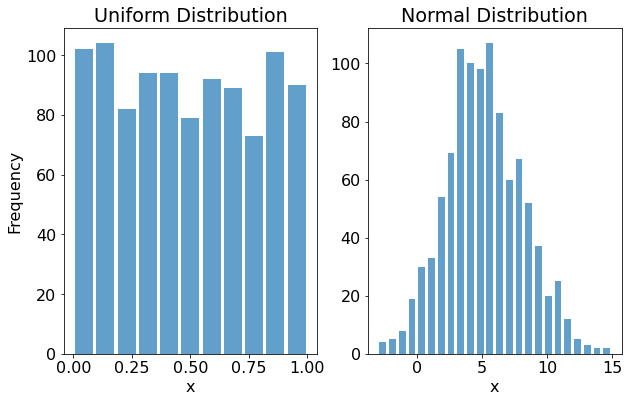

In [66]:
fig = plt.figure()  # Define the figure

ax1 = fig.add_subplot(1, 2, 1)  # define location of first subplot
ax1.hist(x=uniform_data, bins='auto', alpha=0.7, rwidth=0.85)
ax1.set_title("Uniform Distribution")

ax2 = fig.add_subplot(1,2,2)   # define location of second subplot
ax2.hist(x=normal_data, bins='auto', alpha=0.7, rwidth=0.7)
ax2.set_title("Normal Distribution")

ax1.set_ylabel("Frequency")
ax1.set_xlabel("x")
ax2.set_xlabel("x")
plt.show()

As we'd expect, uniform distribution's random values are more or less equally spaced between zero and one. By contrast, the values from the normal distribution take on the characteristic bell-curve shape.

## Putting it all together
Now that we know the basics of NumPy, broadcasting, and vectorization, we have everything we need to start diving into the electricity data that we imported at the start of this article.

Let's assume we'd like to understand how the USA's electricity generation has changed over time.

### Viewing the data
Using what we've learned about indexing, we can start by separating the column labels from the rest of the data.

In [67]:
header = data[0,:]   # create a new NumPy array containing the column labels
data = data[1:,:]   # remove the header from the rest of the data

print(f"Header:\n{header} \n\nFirst two rows:\n{data[:2, :]}")

Header:
['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

First two rows:
[['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']]


To understand how electricity generation has changed with time, we'll need to pay attention to **column 1 (date), column 2 (energy generated), and column 4 (description)**.

In this dataset, rows containing monthly data express date in the format 'YYYYMM'. Rows containing annual data express the date in the format 'YYYY13'.

Our dataset happens to contain generation data from many different energy sources, so let's determine which energy sources are present in this dataset by inspecting the descriptions (column 4).

The `np.unique()` function makes it easy to see all energy sources. As the name suggests, it will return all unique values in the array.

In [68]:
np.unique(data[:, 4])

array(['Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
       'Electricity Net Generation From Geothermal, All Sectors',
       'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors',
       'Electricity Net Generation From Natural Gas, All Sectors',
       'Electricity Net Generation From Nuclear Electric Power, All Sectors',
       'Electricity Net Generation From Other Gases, All Sectors',
       'Electricity Net Generation From Petroleum, All Sectors',
       'Electricity Net Generation From Solar, All Sectors',
       'Electricity Net Generation From Waste, All Sectors',
       'Electricity Net Generation From Wind, All Sectors',
       'Electricity Net Generation From Wood, All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype='<U80')

This dataset contains information from a total of 13 categories of energy sources.

### Extracting wind energy data
Next, we'll extract a subset containing just the wind energy generation data. We'll be making extensive use of indexing with mask arrays, which we looked at earlier.

Let's start by retaining only the rows that contain wind data. First, we'll create a mask array that contains True entries for every row of wind data:

In [69]:
mask_array = (data[:, 4] == 'Electricity Net Generation From Wind, All Sectors')
mask_array

array([False, False, False, ..., False, False, False])

What this mask array essentially says is "get all rows where column four equals 'Electricity Net Generation...'"

Now we can use it to mask our data:

In [70]:
wind_data = data[mask_array]
wind_data

array([['WYETPUS', '194913', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195013', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195113', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202012', '32461.5', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202013', '337509.815', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202101', '30427.432', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Did you notice that we used broadcasting to generate the mask array? Broadcasting allowed the generation of a new array based on the logical evaluation of whether each string element in an array was equal to a single string.

In the above output, we notice that some of the early rows contain the string _Not Available_ in the 'Value' column. _Not Available_ suggests that records only began later on. Let's exclude the rows for which no records exist:

In [72]:
wind_data = wind_data[wind_data[:, 2] != 'Not Available']
wind_data

array([['WYETPUS', '198301', '0.172', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198302', '0.018', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198303', '0.313', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202012', '32461.5', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202013', '337509.815', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202101', '30427.432', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Note that the above code performed indexing using a mask array. For compactness, we didn't explicitly define the mask array as a separate object.

Now, let's retain only the annual data. In other words, **keep only the rows where the value in column 1 ends with '13'**. To do this, we use list comprehension (a pure Python formalism) to generate the mask array to perform the indexing.

In [74]:
annual_mask_array = np.array(([x[-2:] == '13' for x in wind_data[:, 1]]))

wind_data = wind_data[annual_mask_array]
wind_data[:5]

array([['WYETPUS', '198313', '2.668', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198413', '6.49', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198513', '5.762', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198613', '4.189', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198713', '3.541', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

We have now successfully isolated the annual wind data.

It is worth noting that it is straightforward to save a NumPy array to a text file using the `np.savetxt()` function.

Just for fun, let's save our results to a comma-delimited csv file. We will request that NumPy converts everything to a string format before exporting.

In [75]:
np.savetxt('wind.csv', wind_data, fmt ='%s', delimiter = ',')

Now let's define a new NumPy array containing just the annual wind energy produced, which is contained in column two of our wind data array. We will convert information to a float data type:

In [76]:
energy = wind_data[:, 2].astype(float)
energy

array([2.66800000e+00, 6.49000000e+00, 5.76200000e+00, 4.18900000e+00,
       3.54100000e+00, 8.71000000e-01, 2.11204300e+03, 2.78860000e+03,
       2.95095100e+03, 2.88752300e+03, 3.00582700e+03, 3.44710900e+03,
       3.16425300e+03, 3.23406900e+03, 3.28803500e+03, 3.02569600e+03,
       4.48799800e+03, 5.59326100e+03, 6.73733100e+03, 1.03542800e+04,
       1.11874660e+04, 1.41437410e+04, 1.78105490e+04, 2.65891370e+04,
       3.44499270e+04, 5.53631000e+04, 7.38861320e+04, 9.46522460e+04,
       1.20176599e+05, 1.40821703e+05, 1.67839745e+05, 1.81655282e+05,
       1.90718548e+05, 2.26992562e+05, 2.54302695e+05, 2.72667454e+05,
       2.95882484e+05, 3.37509815e+05])

Success! Now that we finally have the data of interest in an array of floating-point numbers, we can start taking advantage of some NumPy functions that can quickly and easily perform numerical operations on our array.

### Mathematical functions
NumPy offers many mathematical functions that can be called with the syntax `array.method()`. For instance, if we wanted to compute the sum of all elements in the array, we could use the function `array.sum()`:

In [77]:
print(f'Total wind energy generated in the USA since 1983 is {energy.sum()} Gigawatt-hours')

Total wind energy generated in the USA since 1983 is 2573749.682 Gigawatt-hours


NumPy functions are also available to calculate things like the mean and standard deviation:

In [78]:
print(f'The average annual energy generated from wind is {energy.mean()} Gigawatt-hours, '
      f'with a standard deviation of {100 * energy.std() / energy.mean():.2f}%')

The average annual energy generated from wind is 67730.25478947368 Gigawatt-hours, with a standard deviation of 145.65%


We can quickly answer many questions using these functions. Here are a couple more.

What was the maximum annual energy generated?

In [80]:
print(f'The highest recorded annual energy generated by wind power is {energy.max()} Gigawatt-hours')

The highest recorded annual energy generated by wind power is 337509.815 Gigawatt-hours


And in what year did that occur?

In [81]:
index = energy.argmax() #this method returns the index of the maximum value in the array
print(f'The highest energy generation occured in the year {wind_data[index,1][:-2]}')

The highest energy generation occured in the year 2020


### Fitting
Another important NumPy's capability is data fitting.

Let's say we wanted to predict the wind energy that will be generated the year after the period spanned by the dataset. A straightforward approach would be to fit a straight line to recent data and then extrapolate it out to the following year.

Although SciPy has some powerful fitting tools, in particular `scipy.optimize.curve_fit()`, it turns out that we don't need to move outside of NumPy to perform this fit.

Within NumPy, our options include `np.linalg.lstsq()` and NumPy's polynomial package. Here, we'll use the latter.



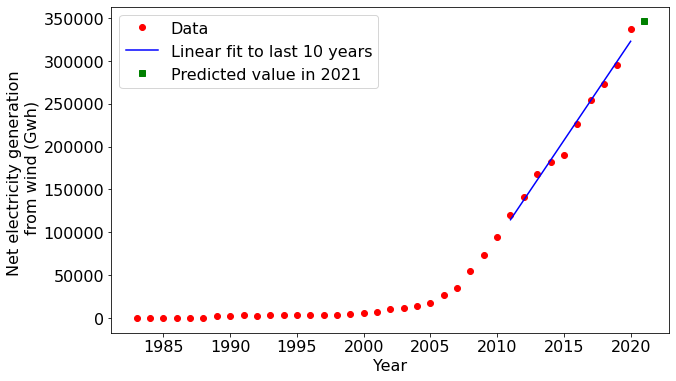

In [83]:
import numpy.polynomial.polynomial as poly

x = np.array([int(j[:4]) for j in wind_data[:,1]]) # Taking the first four digits of each entry in column 1 gives us the year
y = energy

poly_coeff= poly.polyfit(x[-10:], y[-10:],deg=1) # Get coefficients for a first-degree polynomial (straight line) fit for the most recent 10 years of data
fit = poly.polyval(x[-10:], poly_coeff) # Evaluate the fitted polynomial using the polynomial coefficients

fig, ax = plt.subplots() # Define a figure and axis on which to plot our data
ax.plot(x,y, 'ro', label = 'Data') # Plot the data
ax.plot(x[-10:], fit, 'b-', label='Linear fit to last 10 years') # Plot the fit

# Extrapolate
new_point = x[-1] + 1 # 1 year after the final datapoint
fit_new_point = poly.polyval(new_point, poly_coeff)
ax.plot(new_point, fit_new_point, 'gs', label=f'Predicted value in {str(new_point)}') # Plot the fit

# Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Net electricity generation \n from wind (Gwh)')

# Add a legend
plt.legend()

plt.show()

plt.close()

Notice that the matplotlib plotting commands accepted the NumPy arrays as inputs without a problem. You will find this compatibility with NumPy for quite a few other libraries in Python as well. The degree of compatibility reflects NumPy's core role in Python's overall data science and scientific computing capability.

Our plot above shows that the amount of wind-generated electricity has increased rapidly in the USA in the last ten years. But is this simply a consequence of the total electricity generation increasing? Or is the national grid fundamentally shifting toward wind energy? NumPy can help us answer this.

To make things more compact, we'll define a function to index certain rows from the primary dataset based on the earlier approach.

In [84]:
def index_energy_data(data, startyear, energy_label):
    """returns a NumPy array containing only rows with the specified energy_label in column 4, 
    that also contain energy data, and that also contain annual totals after the specified start year """
    
    output = data[((data[:,4] == energy_label))]
    output = output[((output[:,2] != 'Not Available'))]
    output = output[np.array(([x[-2:] == '13' and int(x[:4]) >= startyear for x in output[:,1]]))]
    
    energy = output[:,2].astype(float)
    dates = np.array([int(j[:4]) for j in output[:,1]])  # Taking the first four digits of each entry in column 1 gives us the year
    
    return energy, dates

Now we'll apply this function to generate three arrays. Solar data was recorded from 1984 onwards, so we'll restrict all arrays to this timeframe:

In [85]:
energy_wind, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation From Wind, All Sectors')
energy_solar, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation From Solar, All Sectors')
energy_total, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation Total (including from sources not shown), All Sectors')

Let's compute the contribution of wind, solar, and their combined contribution compared to the total energy generation in the USA:



In [86]:
wind_frac = 100 * energy_wind / energy_total
solar_frac = 100 * energy_solar / energy_total
combined_frac = 100 * (energy_solar + energy_wind) / energy_total

Now we have our data. Did you notice the use of vectorization and broadcasting above? Let's proceed to plotting the results:

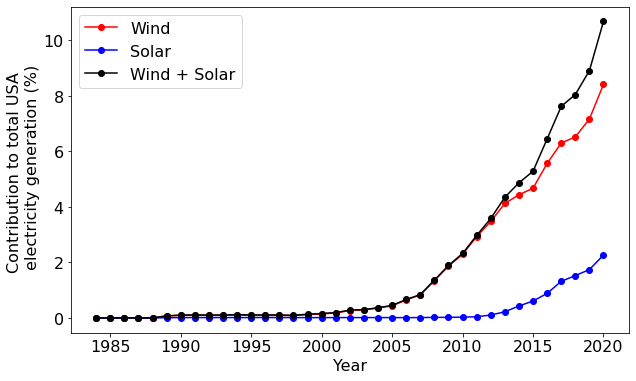

In [87]:
# Prepare the plot
fig, ax = plt.subplots() # Define a figure and axis on which to plot our data
ax.plot(dates, wind_frac, 'ro-', label = 'Wind')
ax.plot(dates, solar_frac, 'bo-', label = 'Solar')
ax.plot(dates, combined_frac, 'ko-', label = 'Wind + Solar')

#Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Contribution to total USA \n electricity generation (%)')

#add a legend
plt.legend()

plt.show()

plt.close()

As this plot shows, the nature of the national grid is changing: there is a rapid change in the mix of electricity sources occurring.

To answer further questions, like what is driving this change, we would need a lot more data on the situation's social and economic factors. Rest assured, as soon as we get that data, NumPy would be up to the task of performing the required data manipulations!

In [ ]:
mkateregga@citinstitute.tech and shawnday.dl@gmail.com